In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Checking shape of train and test
print('Train images shape: {}; Train labels shape: {} \n'.format(train_images.shape, train_labels.shape))
print('Test  images shape: {}; Test  labels shape: {} \n'.format(test_images.shape , test_labels.shape))

1.10.0
Train images shape: (60000, 28, 28); Train labels shape: (60000,) 

Test  images shape: (10000, 28, 28); Test  labels shape: (10000,) 



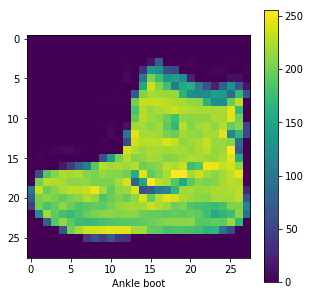

In [2]:
# show first image
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (5, 5))
plt.imshow(train_images[0,...])
plt.xlabel(categories[train_labels[0]])
plt.colorbar()

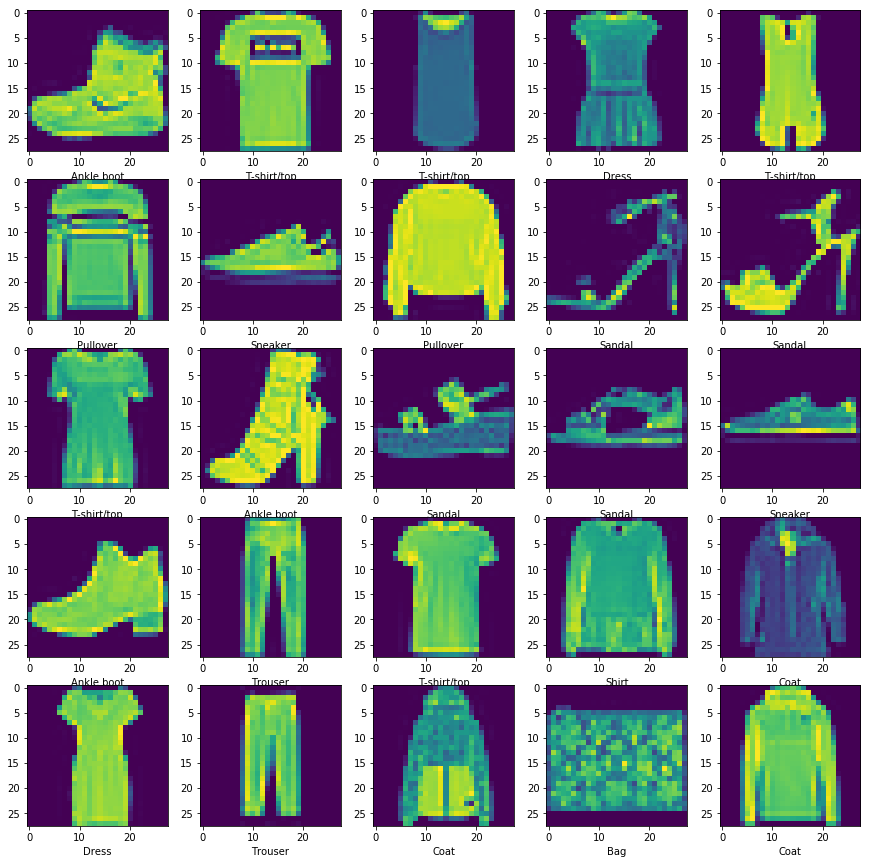

In [13]:
# show 25 first images
plt.figure(figsize = (15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i,...])
    plt.xlabel(categories[train_labels[i]])

In [22]:
#Not yet preprocessing data
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

optimizer = tf.train.AdamOptimizer()

model.compile(
    optimizer = optimizer,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 9s 146us/step - loss: 13.3209 - acc: 0.1734

In [23]:
#Preprocessing data
train_images = train_images/255
test_images = test_images/255

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

optimizer = tf.train.AdamOptimizer()

model.compile(
    optimizer = optimizer,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)



model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.4968 - acc: 0.8258

In [26]:
#Evaluate model
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Train loss: {:.4f}, Train accuracy: {:.4f}'.format(train_loss, train_acc))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(test_loss, test_acc))

60000/60000 [==============================] - 4s 63us/step

In [28]:
#Predict in test dataset
predictions = model.predict(test_images)
#Probability for first observation
predictions[0]

array([1.4036671e-07, 4.2546966e-09, 3.8430562e-06, 8.9651877e-08,
       1.0710750e-06, 1.7610726e-04, 9.0122626e-07, 1.7891280e-02,
       1.4973621e-04, 9.8177689e-01], dtype=float32)

Text(0.5,1,'Ankle boot : 98.18%')

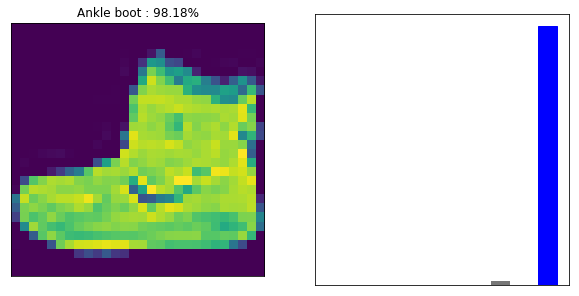

In [57]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 2)
prob_bar = plt.bar(range(10), predictions[0], color = '#777777')
plt.xticks([])
plt.yticks([])
category = np.argmax(predictions[0])
true_label = test_labels[0]
prob_bar[category].set_color('red')
prob_bar[true_label].set_color('blue')
plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.xticks([])
plt.yticks([])
plt.title('%s : %.2f'%(categories[category], predictions[0, category]*100)+'%')